## RECAP:

Chapter 1:
workflow for testing proportions vs a hypotheszied value

False negative/false positive errors


Chapter 2:
Testing differences in sample means between two groups using t-tests

Extending this to more than two groups using ANOVA and pairwise t-tests


CHAPTER 3: Tested for differences in proportions between two groups using proportion tests.

We then extended it to more than two groups with chi-square independence tests, and returned to the one sample case with chi-square goodness of fit tests.


Chapter 4: we learned about the assumptions made by parametric hypothesis tests

and saw how non-parametric tests can be used when those assumptions aren't met.

# Course Description
Hypothesis testing lets you answer questions about your datasets in a statistically rigorous way. In this course, you'll grow your Python analytical skills as you learn how and when to use common tests like t-tests, proportion tests, and chi-square tests. Working with real-world data, including Stack Overflow user feedback and supply-chain data for medical supply shipments, you'll gain a deep understanding of how these tests work and the key assumptions that underpin them. You'll also discover how non-parametric tests can be used to go beyond the limitations of traditional hypothesis tests.

#CHAPTER 1
## Introduction to Hypothesis Testing

How does hypothesis testing work and what problems can it solve? To find out, you’ll walk through the workflow for a one sample proportion test. In doing so, you'll encounter important concepts like z-scores, p-values, and false negative and false positive errors.

Recap:
1. Standard error of sample statistic from bootstrap distrubtion
2. Compute a standardized test statistic
3. calculate a pvalue
4. decide which hypothesis made most sense

## Uses of A/B testing
In the video, you saw how Electronic Arts used A/B testing on their website when launching SimCity 5. One version of the page showed an advertisement for a discount, and one version did not. Half the users saw one version of the page, and the other half saw the second version of the page.

What is the main reason to use an A/B test?

Answer: It provides a way to check otucomes of competing scnearios and decide which way to proceed

# Calculating the sample mean
The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()
late_shipments is available, and pandas is loaded as pd.

In [ ]:
import pandas as pd
late_shipments= pd.read_feather('late_shipments.feather')
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [ ]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

# Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

In [ ]:
import numpy as np
late_shipments_boot_distn = []

# bootstrap distribution
for i in range (5000):
    late_shipments_boot_distn.append(
        (late_shipments.sample(frac=1, replace=True)["late"] == "Yes").mean()
    )

# standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

In [ ]:
# hypothesize the proportion is 6%
late_prop_hyp= 0.06

# calculate the standard error
std_error= np.std(late_shipments_boot_distn, ddof=1)

# find the z-score of late_prop_samp
z_score= (late_prop_samp - late_prop_hyp)/std_error

print(z_score)

# z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.

0.1297784978527424


## P-values

Criminal trials and hypothesis tests
In the video, you saw how hypothesis testing follows a similar process to criminal trials.

Which of the following correctly matches up a criminal trial with properties of a hypothesis test?

Just as the defendant is initially assumed not guilty, the null hypothesis is first assumed to be true.

### Left tail, right tail, two tails
Hypothesis tests are used to determine whether the sample statistic lies in the tails of the null distribution. However, the way that the alternative hypothesis is phrased affects which tail(s) we are interested in.

If the alternative hypothesis is about a difference between the sample statistic and the hypothesized value, then you need a two-tailed test.

If the alternative hypothesis is about the sample statistic being less than the hypothesized value, then you need a left-tailed test.

If the alternative hypothesis is about the sample statistic being greater than the hypothesized value, then you need a right-tailed test.

### Calculating p-values
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis,
, is that the proportion of late shipments is six percent.

The alternative hypothesis,
, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

Right tailed test

In [ ]:
from scipy.stats import norm

In [ ]:
# calculate zscore
z_score= (late_prop_samp- late_prop_hyp) / std_error

# calculate the pvalue
p_value= 1 - norm.cdf(z_score, loc=0, scale=1)

#print
print(p_value)

#The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.

0.4483708376264385


## Statistical significance


### Decisions from p-values


If the p-value is less than or equal to the significance level, you reject the null hypothesis.

ex: pvalue < 0.05 reject Null hyptohesis accept alternate hypthosis

### Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

In [ ]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, .975)

# Print the confidence interval
print((lower, upper))

# Since 0.6 is included in 95% confidence interval we fail to reject null hypothesis, due to larget p-value
#When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

(0.046, 0.077)


### Type I and type II errors
For hypothesis tests and for criminal trials, there are two states of truth and two possible outcomes. Two combinations are correct test outcomes, and there are two ways it can go wrong.

The errors are known as false positives (or "type I errors"), and false negatives (or "type II errors").

If you chose to Alternative hypothesis but it actaully is null hypothesis false positive

If you chose the null hypothesis and it is actaully alternative hypothesis false negative

# CHAPTER 2 Two-Sample and ANOVA Tests


In this chapter, you’ll learn how to test for differences in means between two groups using t-tests and extend this to more than two groups using ANOVA and pairwise t-tests.



### Hypothesis testing workflow
You've seen the hypothesis testing workflow for the one sample case where you compared a sample mean to a hypothesized value, and the two sample case where you compared two sample means. In both cases, the workflow shares common steps.

1. Identify population parameter that is hypothesized about
2. Specify the null and alternative hypothesis
3. Detemine (standarized) test statistic and corresponding Null Distrubtion
4. Conduct hypothesis testing in Python
5. Measure evidence against null hypothesis
6. Make decision comparing evidence to significance level
7. interpret the results in teh context of original problem

### Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.





While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

In [ ]:
late_shipments.groupby('late')['weight_kilograms'].mean()

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

In [ ]:
xbar_yes= late_shipments[late_shipments.late == 'Yes']['weight_kilograms'].mean()
xbar_no= late_shipments[late_shipments.late == 'No']['weight_kilograms'].mean()
s_no = late_shipments[late_shipments.late == 'No']['weight_kilograms'].std()
s_yes= late_shipments[late_shipments.late == 'Yes']['weight_kilograms'].std()
n_no= len(late_shipments[late_shipments.late == 'No'])
n_yes= len(late_shipments[late_shipments.late == 'Yes'])
print(s_yes)

2544.688210903328


In [ ]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

# Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.

-2.3936661778766433


## Calculating p-values from t-statistics


### Why is t needed?
The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted
, and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted
, and the transformation used the t-distribution.

In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?

a:
When a sample standard deviation is used in estimating a standard error.
Using 2 groups

### The t-distribution
The t-distribution is used to calculate the p-value from the
 test statistic, and having a sense of how the PDF and CDF look can help you understand this calculation. It has two parameters: the degrees of freedom, and the non-centrality parameter.

The plots show the PDF and CDF for a t-distribution (solid black line), and for comparison show a standard normal distribution with mean 0 and variance 1 (gray dotted line).


As you increase the degrees of freedom, the t-distribution PDF and CDF curves get closer to those of a normal distribution.



### From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

Null Hypothesis: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

Alternative: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

Left-test

In [ ]:
from scipy.stats import t
# calculate degree of freedom. Len of no + len of yes/2
degrees_of_freedom= n_no + n_yes -2

# calculcate the pvalue from the test stat
p_value= t.cdf(t_stat, df=degrees_of_freedom)

#print
print(p_value)

# reject null hypothesis
#W When the standard error is estimated from the sample standard deviation and sample size, the test statistic is transformed into a p-value
# using the t-distribution.

0.008432382146249523


## Paired t-tests

In [ ]:
!pip install pingouin
import pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=f96d7207f0ceef066cfb9b0058ccbcf11e39b42b93e03eeb73af586c34a289d9
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


### Is pairing needed?
t-tests are used to compare two sample means. However, the test involves different calculations depending upon whether the two samples are paired or not. To make sure you use the correct version of the t-test, you need to be able to identify pairing.

Paired: pre and post test are given to the same random sample of students

Non-Paired: pre and post test are given to two different random samples of students

# Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

In [ ]:
sample_dem_data= pd.read_feather('dem_votes_potus_12_16.feather')
sample_dem_data.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


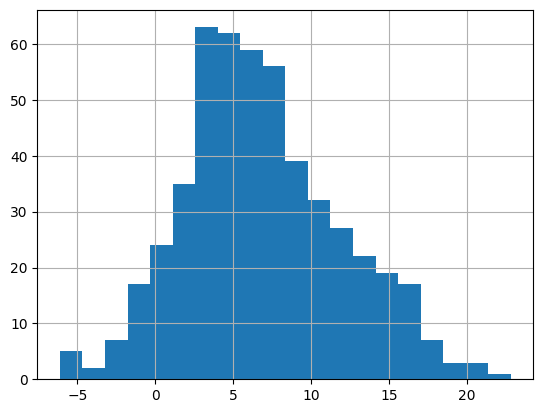

In [ ]:
import matplotlib.pyplot as plt
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

#Notice that the majority of the histogram lies to the right of zero.

### Using ttest()
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

Null Hypothesis: The proportion of democratic votes in 2012 and 2016 were the same.

Alternative hypothesis: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.

In [ ]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0, alternative='two-sided')



# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


In [ ]:
# conduct a pair ttest
pair_results= pingouin.ttest(x= sample_dem_data['dem_percent_12'], y= sample_dem_data['dem_percent_16'], paired=True, alternative='two-sided')
print(pair_results)

# Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?
# increases
# When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


## ANOVA tests

test for difference between groups

### Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

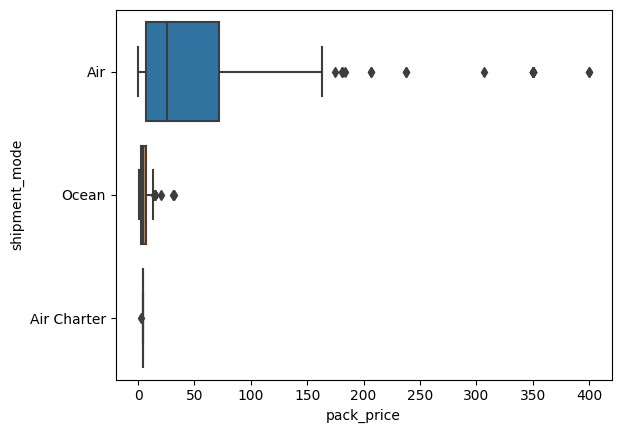

In [ ]:
import seaborn as sns
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price', y='shipment_mode', data=late_shipments)
plt.show()

#There certainly looks to be a difference in the pack price between each of the three shipment modes.
# Do you think the differences are statistically significant?

### Conducting an ANOVA test
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

Null: Pack prices for every category of shipment mode are the same.

Alternatvie: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

late_shipments is available and pingouin has been loaded.

In [ ]:
# get anova test
anova= pingouin.anova(data= late_shipments, dv='pack_price', between='shipment_mode')
print(anova)

#There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


### Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

In [ ]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv='pack_price', between='shipment_mode')

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [ ]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments,
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

# After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


#CHAPTER 3 Proportion Test

Now it’s time to test for differences in proportions between two groups using proportion tests. Through hands-on exercises, you’ll extend your proportion tests to more than two groups with chi-square independence tests, and return to the one sample case with chi-square goodness of fit tests.

### t for proportions?
Some of the hypothesis tests in this course have used a
 test statistic and some have used a
 test statistic. To get the correct p-value, you need to use the right type of test statistic.

Do tests of proportion(s) use a
z or a t
 test statistic and why?

 Answer: z : The test statistic for proportion(s) has only one estimate of a parameter instead of two.


### Test for single proportions
In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

You'll revisit the p-value using this simpler calculation.

late_shipments is available. pandas and numpy are available under their usual aliases, and norm is loaded from scipy.stats.

In [ ]:
# Hypothesize that the proportion of late shipment is 6%
p_0= 0.06

# calculate the sample proportion of late shipments
p_hat= (late_shipments.late == 'Yes').mean()

# calculate length
n= len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator
print(z_score)

0.13315591032282698


In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1- norm.cdf(z_score)

# Print the p-value
print(p_value)

#For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

0.44703503936503364


## Two-sample proportion tests

comparing two proportions: proporiton of amazon users is the same for those under thirty as those thirty

## Test of two proportions
You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

Null Hypothesis: late_expensive - late_resonable =0
Alternative Hypothesis: late_expensive - late_resonable >0

p_hats contains the estimates of population proportions (sample proportions) for each freight_cost_group:

freight_cost_group  late
expensive           Yes     0.082569
reasonable          Yes     0.035165
Name: late, dtype: float64
ns contains the sample sizes for these groups:

freight_cost_group
expensive     545
reasonable    455
Name: late, dtype: int64
pandas and numpy have been imported under their usual aliases, and norm is available from scipy.stats.

In [ ]:
p_hats = (
    late_shipments.
    groupby("freight_cost_groups")["late"].value_counts(normalize=True)
).filter(like='Yes', axis=0)

p_hats

freight_cost_groups  late
expensive            Yes     0.079096
reasonable           Yes     0.035165
Name: late, dtype: float64

In [ ]:
ns = late_shipments.groupby("freight_cost_groups")["late"].count()
ns

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

print(p_hat)

late
Yes    0.058824
Name: late, dtype: float64


In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

print(std_error)

late
Yes    0.015031
Name: late, dtype: float64


In [ ]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error
print(z_score)

late
Yes    2.922649
Name: late, dtype: float64


In [ ]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

[0.00173534]


### proportions_ztest() for two samples
That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

Recall the hypotheses.

Null Hypothesis: late_expensive - late_resonable =0

Alternative Hypothesis: late_expensive - late_resonable >0

late_shipments is available, containing the freight_cost_group column. numpy and pandas have been loaded under their standard aliases, and proportions_ztest has been loaded from statsmodels.stats.proportion.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()
print(late_by_freight_cost_group)
# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([500 +45, 439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative='larger')


# Print the results
print(stat, p_value)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64
3.1190401865206128 0.0009072060637051224


## Chi-square test of independence
extend proportion test for more then two groups

### The chi-square distribution
Chi-square hypothesis tests rely on the chi-square distribution. Like the t-distribution, it has degrees of freedom and non-centrality parameters.

The plots show the PDF and CDF for a chi-square distribution (solid black line), and for comparison show a normal distribution with the same mean and variance (gray dotted line).

Which statement about the chi-square distribution is true?

A: As you increase the degrees of freedom or the non-centrality, the chi-square distribution PDF and CDF curves get closer to those of a normal distribution.

### How many tails for chi-square tests?
Unlike pingouin.ttest() and statsmodels.stats.proportion.proportions_ztest(), pingouin.chi2_independence() does not have an alternative argument to specify which tails are considered by the alternative hypothesis.

Which tail is almost always considered in chi-square tests?

Answer: Right tail

### Performing a chi-square test
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

EXW: "Ex works". The buyer pays for transportation of the goods.
CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
FCA: "Free carrier". The seller pays for transportation of the goods.
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

Null: vendor_inco_term and freight_cost_group are independent.

Alternative: vendor_inco_term and freight_cost_group are associated.

late_shipments is available, and the following have been loaded: matplotlib.pyplot as plt, pandas as pd, and pingouin.

In [ ]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)
print(props)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: freight_cost_groups, dtype: float64
freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                        NaN    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


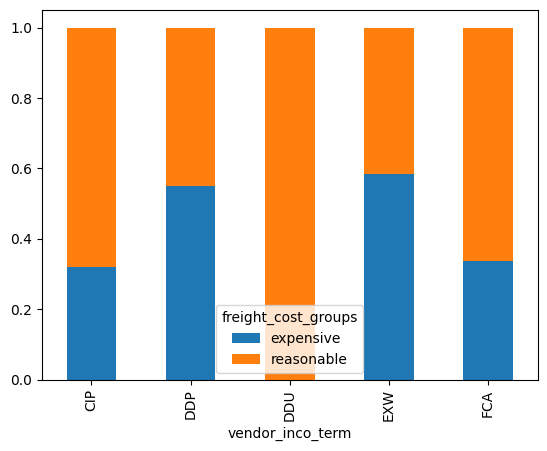

In [ ]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

In [ ]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='vendor_inco_term', y='freight_cost_groups')

# Print results
print(stats[stats['test'] == 'pearson'])
print(stats)
print("Reject the null hypthesis and conclude that vendor_inco_term and frieght_cost_group are assoicated")

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235
                 test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  34.805072  4.0  5.093922e-07  0.186561   
1        cressie-read  0.666667  34.845134  4.0  4.998337e-07  0.186669   
2      log-likelihood  0.000000  35.442911  4.0  3.767119e-07  0.188263   
3       freeman-tukey -0.500000        NaN  4.0           NaN       NaN   
4  mod-log-likelihood -1.000000        inf  4.0  0.000000e+00       inf   
5              neyman -2.000000        NaN  4.0           NaN       NaN   

      power  
0  0.999235  
1  0.999244  
2  0.999361  
3       NaN  
4       NaN  
5       NaN  
Reject the null hypthesis and conclude that vendor_inco_term and frieght_cost_group are assoicated


/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7413: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


## Chi-square goodness of fit tests


### Visualizing goodness of fit
The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

CIP: 0.05
DDP: 0.1
EXW: 0.75
FCA: 0.1
These frequencies are stored in the hypothesized DataFrame.

The incoterm_counts DataFrame stores the .value_counts() of the vendor_inco_term column.

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases.

In [ ]:
hypothesized = pd.DataFrame ({'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'], 'prop': [0.05, 0.10, 0.75, 0.10]})
hypothesized

,vendor_inco_term,prop
0,CIP,0.05
1,DDP,0.10
2,EXW,0.75
3,FCA,0.10


In [ ]:
incoterm_counts = (
    late_shipments["vendor_inco_term"]
    .value_counts()
    .rename_axis("vendor_inco_term")
    .reset_index(name="n")
    .sort_values("vendor_inco_term")
)

incoterm_counts
incoterm_counts.drop([4], inplace=True)

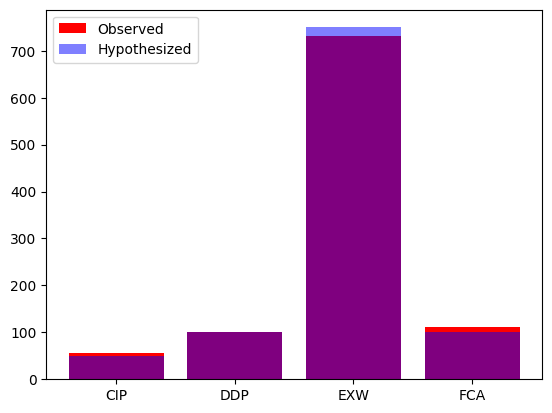

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized.vendor_inco_term, hypothesized.n, alpha=0.5,color='blue',label="Hypothesized")
plt.legend()
plt.show()

# Head on over to the next exercise to test if these differences are statistically significant.

## Performing a goodness of fit test
The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

Null Hypothesis: The sample matches with the hypothesized distribution.

Alternative Hypothesis: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

late_shipments, incoterm_counts, and hypothesized from the last exercise are available. chisquare from scipy.stats has been loaded.

In [ ]:
from scipy.stats import chisquare
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts.n, f_exp= hypothesized.n)


# Print gof_test results
print(gof_test)

ValueError: ignored

# CHAPTER 4 Non-Parametric Tests
Finally, it’s time to learn about the assumptions made by parametric hypothesis tests, and see how non-parametric tests can be used when those assumptions aren't met.

Sample sizes: ttests >30 for one sample, two samples, paired samples, ANOVA

>10 proportion test
>5 Chi-square

### Common assumptions of hypothesis tests
Hypothesis tests make assumptions about the dataset that they are testing, and the conclusions you draw from the test results are only valid if those assumptions hold. While some assumptions differ between types of test, others are common to all hypothesis tests.

Which of the following statements is a common assumption of hypothesis tests?

Answer: All hypothesis tests assume that the data are collected at random from the population, that each row is independent of the others, and that the sample size is "big enough".

### Testing sample size
In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the late_shipments dataset.

Note that the .all() method from pandas can be used to check if all elements are true. For example, given a DataFrame df with numeric entries, you check to see if all its elements are less than 5, using (df < 5).all().

late_shipments is available, and pandas is loaded as pd.

In [ ]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True


In [ ]:
# Count the late values
counts = late_shipments.late.value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     939
Yes     61
Name: late, dtype: int64
True


In [ ]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False


In [ ]:
# Count the shipment_mode values
counts = late_shipments.shipment_mode.value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

#While randomness and independence of observations can't easily be tested programmatically,
# you can test that your sample sizes are big enough to make a hypothesis test appropriate.

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


## Non-parametric tests

z-test, t-test, ANOVA are all parametric test, assume normal distribution

Non-parametric test avoid parametric assumptions and conditions, many test use ranks of data

### Which parametric test?
Which test is a parametric equivalent to the Wilcoxon signed-rank test?

Answer: Paired t-test

### Wilcoxon signed-rank test
You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

sample_dem_data is available, and has columns dem_percent_12 and dem_percent_16 in addition to state and county names. The following packages have also been loaded: pingouin and pandas as pd.

In [ ]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data.dem_percent_12, y=sample_dem_data.dem_percent_16, paired=True, alternative='two-sided')




# Print paired t-test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [ ]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data.dem_percent_12, y=sample_dem_data.dem_percent_16, alternative='two-sided')



# Print Wilcoxon test results
print(wilcoxon_test_results)

print('Given the large sample size (500), you obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.')

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816
Given the large sample size (500), you obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.


## Non-parametric ANOVA and unpaired t-tests


### Wilcoxon-Mann-Whitney
Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

In [ ]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late',
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['Yes'], y=weight_vs_late_wide['No'], alternative='two-sided')



# Print the test results
print(wmw_test)

#. The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late

#The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.

       U-val alternative     p-val       RBC      CLES
MWU  38145.0   two-sided  0.000014 -0.331902  0.665951


# Kruskal-Wallis
Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

In [ ]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,
                           dv='weight_kilograms',
                           between='shipment_mode')

# Print the results
print(kw_test)

#Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
